# **WARNING**

In order for this notebook to run, you must first run the notebook `analysis/0_analysis_skill/0_0_generate_skill_models.ipynb.ipynb` and generate the files `data_parameter/player_gaussin_fit/grid_full/e{x}_player{y}_gaussin_prob_grid.pkl` for all epsilon x and player y that you want to consider when using this notebook. These files contain the transition probability distributions that were calculated by integrating the bivariate Gaussian distributions for a given player-epsilon combination. 

# 1.0 Notebook Configuration

Please specify the following variables:
1. `project_directory`: your project directory path
2. `epsilon_list`: the list of execution error multiplers (epsilon) that you want to consider in your analysis.
3. `player_id`: the index of the player that you want to use for the base skill model. 
    - Initial paper analysis used `player_id=10` (Smith)
    - Average professional player model usese `player_id='AVG'`
    - Additional player index options can be found in Section 4.4. of `analysis/0_analysis_skill/0_1_eda_skill_models.ipynb`

In [1]:
# Change this to the project directory path for your computer  
# project_directory = '/Users/rachael/Desktop/darts-thesis'
project_directory = '/Users/Craig/PycharmProjects/darts-thesis'

# Set the epsilons that will be considered in this analysis 
epsilon_list = [1,2,3,4,5,6,7,8,9]
#epsilon_list = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,32,64,128]

# Set the ID of the player skill models you want to use 
player_id = 10
player_id = "AVG"



# 2.0 Notebook Setup

In [2]:
# Import and configure modules from this project

import os

os.chdir(project_directory)

import function_init_simple_mdp as imdp
import function_helpers_singleplayer as h

import function_init_board as fb
data_parameter_dir = fb.data_parameter_dir


In [3]:
# Import and configure external modules

import pandas as pd

import matplotlib.pyplot as plt


# 3.0 Load Data

In [4]:
# Reformat name of desired player 
name_pa = 'player{}'.format(player_id)

# Get the transition probabilities when aiming for the centre double bullseye (action 728)
bullseye_probs = []

# Iterate through different epsilons
for epsilon in epsilon_list: 
    # Load transition probabilities 
    [aiming_grid, prob_grid_normalscore_nt, prob_grid_singlescore_nt, prob_grid_doublescore_nt, prob_grid_triplescore_nt, prob_grid_bullscore_nt] = h.load_aiming_grid(name_pa, epsilon=epsilon, data_parameter_dir=data_parameter_dir, grid_version='custom_no_tokens')
    # Save transition probabilities when aiming for the DB 
    bullseye_probs.append(prob_grid_bullscore_nt[728].copy())

load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/playerAVG_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/playerAVG_e2_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/playerAVG_e3_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/playerAVG_e4_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/playerAVG_e5_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/playerAVG_e6_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/playerAVG_e7_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/playerAVG_e8_gaussin_prob_grid_custo

In [5]:
# Create a list of hitting different probability regions
prob_list = []

# For each epsilon, get the probabilities of them hitting different probabilities 
for i in range(len(epsilon_list)):
    db_prob = bullseye_probs[i][1] # probability of hitting the double bullseye
    sb_prob = bullseye_probs[i][0] # probability of hitting the single bullseye
    other = 1 - db_prob - sb_prob # probability of hitting any surrounding region 
    epsilon = epsilon_list[i] #corresponding epsilon 
    prob_list.append([epsilon,db_prob,sb_prob,other]) # append to probability list 

# Combine into a skill dataframe 
df_skill = pd.DataFrame(prob_list,columns= ['epsilon','DB','SB','Other'])
df_skill = df_skill.set_index('epsilon')


# 4.0 Skill Estimation Efficacy

We see there is a plateau effect for high epsilons where this test is less effective at differentiating between different epsilons. Would likely need a more sensitive test in practice where players aim for different locations on the board and you can combine the information. Could also improve sensitivity by differentiating between sub-regions currently lumped into "other" (i.e. inner singles, triples, outer singles, doubles, board misses).

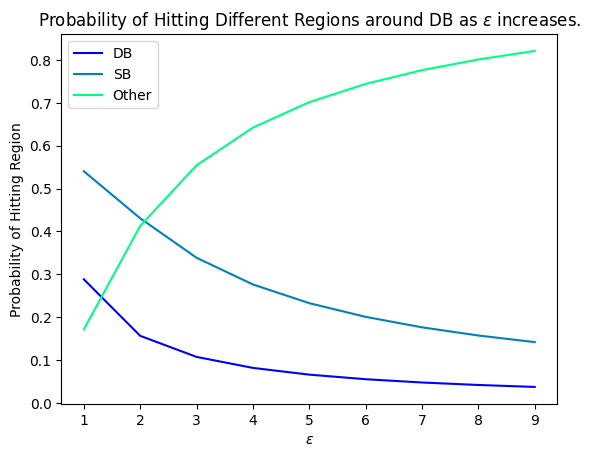

In [6]:
# Plot the probability of hitting different regions 
fig = df_skill.plot(colormap='winter')

# Labels and title
fig = plt.xlabel('$\epsilon$')
fig = plt.ylabel('Probability of Hitting Region')
fig = plt.title('Probability of Hitting Different Regions around DB as $\epsilon$ increases.')


# 5.0 Skill Estimation Tool

We can transform these probabilities into a tangible tool for estimating players' $\epsilon$ values by multiplying it by some $d$ which represents the number of darts thrown by a player. If a player throws $d$ darts, $p(X)*d$ will give the estimated number of darts that fall into region X. We can then round these numbers to get a tool that allows players to estimate their epsilons. The total sum of estimated darts across all regions should be $d$. 

In [7]:
## Set the number of darts thrown d 
d = 30 # 30 was chosen as the default since this was a realistic number with a nice rounded output having different values for each epsilon


In [8]:
# Probability dataframe
df_skill.head(9)

,DB,SB,Other
epsilon,,,
1,0.288253,0.540504,0.171243
2,0.156316,0.430686,0.412999
3,0.107125,0.338547,0.554329
4,0.081467,0.276215,0.642318
5,0.065721,0.232560,0.701719
6,0.055075,0.200566,0.744359
7,0.047396,0.176202,0.776402
8,0.041596,0.157062,0.801341
9,0.037061,0.141645,0.821294


In [9]:
# Convert this to expected darts 
df_skill_n = df_skill * d

# Round the numbers so that users don't have to deal with fractional darts
df_skill_n_round = df_skill_n.round()


df_skill_n_round.head(9)

,DB,SB,Other
epsilon,,,
1,9.0,16.0,5.0
2,5.0,13.0,12.0
3,3.0,10.0,17.0
4,2.0,8.0,19.0
5,2.0,7.0,21.0
6,2.0,6.0,22.0
7,1.0,5.0,23.0
8,1.0,5.0,24.0
9,1.0,4.0,25.0


In [10]:
# Sanity check to ensure everything sums to d
print(df_skill_n_round.sum(axis=1))

epsilon
1    30.0
2    30.0
3    30.0
4    29.0
5    30.0
6    30.0
7    29.0
8    30.0
9    30.0
dtype: float64
